In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
'''Загрузите датасет transaction_data.csv. Проверьте размер таблицы, 
типы переменных, число пропущенных значений и описательную статистику.
'''
df = pd.read_csv(r'C:\Users\asus\Desktop\DA_projects\karpov\band5\task2\transaction_data.csv')
df.head()

,date,name,transaction
0,2020-03-02 00:37:20,Ekaterina_Petrova,cancelled
1,2020-03-02 00:59:09,Irina_Fedorova,successfull
2,2020-03-02 01:06:14,Ekaterina_Smirnova,successfull
3,2020-03-02 00:02:58,Lolita_Polyanova,cancelled
4,2020-03-02 00:17:52,Julia_Smirnova,cancelled


In [4]:
#размер таблицы
df.shape

(5315, 3)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5315 entries, 0 to 5314
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   date         5315 non-null   object
 1   name         5315 non-null   object
 2   transaction  5315 non-null   object
dtypes: object(3)
memory usage: 124.7+ KB


In [6]:
df.describe()

,date,name,transaction
count,5315,5315,5315
unique,3373,56,3
top,2020-03-02 00:33:10,Masha_Ozerova,successfull
freq,6,112,3692


In [11]:
'''Какие значения находятся в колонке transaction? 
Сколько наблюдений относятся к тому или иному уровню? Визуализируйте результат с помощью барплота. 
Подумайте, как можно улучшить график.
'''
df['transaction'].value_counts()

successfull    3692
cancelled      1619
error             4
Name: transaction, dtype: int64

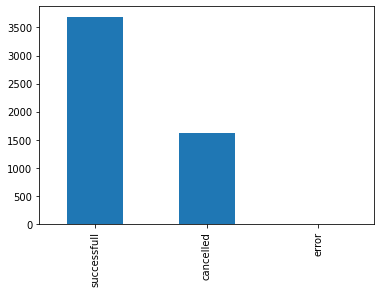

In [10]:
df['transaction'].value_counts().plot(kind='bar')
plt.show()

<AxesSubplot:ylabel='Frequency'>

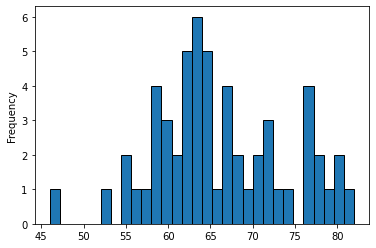

In [17]:
'''Сколько успешных транзакций осуществил каждый из пользователей? 
Постройте гистограмму распределения числа успешных транзакций.
'''
df[df['transaction']=='successfull']['name'].value_counts().plot(kind='hist',bins=30,edgecolor='black')

In [29]:
'''Коллега прислал Вам обновленные данные. (transaction_data_updated.csv)
Постройте сводную таблицу user_vs_minute_pivot, где в качестве столбцов будут использованы 
имена пользователей, строк – минуты, 
значений – число совершенных операций в указанную минуту. Пропущенные значения заполните нулями.
'''
df2 = pd.read_csv(r'C:/Users/asus/Desktop/DA_projects/karpov/band5/task2/transaction_data_updated.csv',parse_dates=['date'])
df2

,date,name,transaction,minute
0,2020-03-02 00:37:20,Ekaterina_Petrova,cancelled,37
1,2020-03-02 00:59:09,Irina_Fedorova,successfull,59
2,2020-03-02 01:06:14,Ekaterina_Smirnova,successfull,6
3,2020-03-02 00:02:58,Lolita_Polyanova,cancelled,2
4,2020-03-02 00:17:52,Julia_Smirnova,cancelled,17
...,...,...,...,...
5310,2020-03-02 00:09:28,Vasilisa_Fedorova,successfull,9
5311,2020-03-02 00:46:31,Vasilisa_Ozerova,successfull,46
5312,2020-03-02 00:16:38,Olga_Polyanova,successfull,16
5313,2020-03-02 00:13:00,Ekaterina_Smirnova,successfull,13


In [30]:
user_vs_minute_pivot = df2.pivot_table(values='transaction',index='minute',columns='name',aggfunc='count',fill_value=0)
user_vs_minute_pivot.head()

name,Ekaterina_Fedorova,Ekaterina_Ivanova,Ekaterina_Lesnova,Ekaterina_Ozerova,Ekaterina_Petrova,Ekaterina_Polyanova,Ekaterina_Smirnova,Irina_Fedorova,Irina_Ivanova,Irina_Lesnova,...,Svetlana_Petrova,Svetlana_Polyanova,Svetlana_Smirnova,Vasilisa_Fedorova,Vasilisa_Ivanova,Vasilisa_Lesnova,Vasilisa_Ozerova,Vasilisa_Petrova,Vasilisa_Polyanova,Vasilisa_Smirnova
minute,,,,,,,,,,,,,,,,,,,,,
0,3,4,2,3,4,4,2,1,2,2,...,0,3,1,1,4,1,3,0,0,1
1,4,4,0,4,2,5,4,4,4,3,...,4,5,3,2,3,3,0,0,3,2
2,1,2,4,4,2,1,3,2,3,3,...,4,1,3,3,0,1,2,1,3,1
3,3,0,2,0,5,2,1,3,2,2,...,1,5,5,2,4,0,3,4,1,0
4,3,0,0,3,1,1,2,3,2,1,...,1,2,2,1,1,2,2,3,0,1


In [36]:
df2['true_minute'] = (df2['date'] - df2['date'].min()).astype('timedelta64[m]')

In [47]:
user_vs_minute_pivot = df2.pivot_table(values='transaction',index='true_minute',
                                       columns='name',aggfunc='count',fill_value=0)

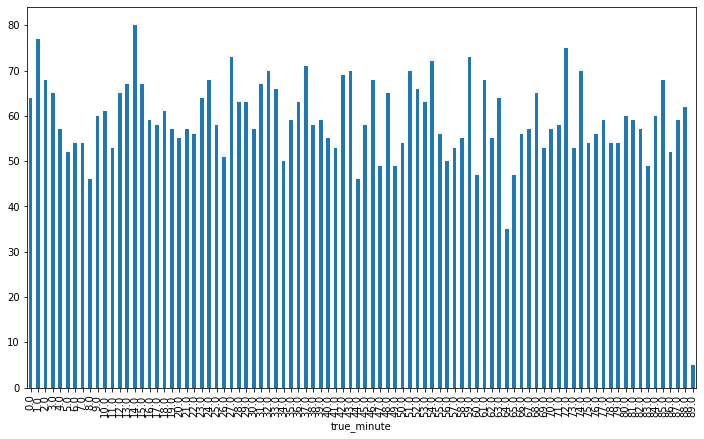

In [49]:
user_vs_minute_pivot.sum(axis=1).plot(kind='bar',figsize=(12,7))
plt.show()